In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds

tfkl = tfk.layers
from tensorflow.data.experimental import sample_from_datasets

**Preprocessing**

As typical, we'll start with the MNIST data. Recall from last time, we have to do some transformations and preprocessing on these images.

In [2]:
data, info = tfds.load('mnist', with_info=True)

In [3]:
preprocess = lambda d: (tf.cast(d["image"], tf.float32)/255, tf.one_hot(d["label"], depth=10))

ds_train = data["train"].map(preprocess).cache().batch(32)
ds_test = data["test"].map(preprocess).cache().batch(32)

In [4]:
img_shape = info.features['image'].shape

In [5]:
img_shape

(28, 28, 1)

**CNNs in TF Keras**

We'll use the Sequential class rely on new layer types that correspond to concepts we covered in lecture: Conv2D, AvgPool2D, MaxPool2D. 

Details such as kernel size, padding, strides and so on must be specified as args to these classes, where appropriate.

In [6]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 1s 63ms/step - loss: 2.3068 - val_loss: 2.3006
Epoch 2/20
20/20 [==============================] - 1s 33ms/step - loss: 2.2917 - val_loss: 2.2864
Epoch 3/20
20/20 [==============================] - 1s 33ms/step - loss: 2.2720 - val_loss: 2.2714
Epoch 4/20
20/20 [==============================] - 1s 33ms/step - loss: 2.2562 - val_loss: 2.2556
Epoch 5/20
20/20 [==============================] - 1s 33ms/step - loss: 2.2416 - val_loss: 2.2380
Epoch 6/20
20/20 [==============================] - 1s 33ms/step - loss: 2.2285 - val_loss: 2.2170
Epoch 7/20
20/20 [==============================] - 1s 33ms/step - loss: 2.2071 - val_loss: 2.1961
Epoch 8/20
20/20 [==============================] - 1s 33ms/step - loss: 2.1882 - val_loss: 2.1706
Epoch 9/20
20/20 [==============================] - 1s 33ms/step - loss: 2.1233 - val_loss: 2.1405
Epoch 10/20
20/20 [==============================] - 1s 33ms/step - loss: 2.1168 - val_loss: 2.1050
Epoch 11/

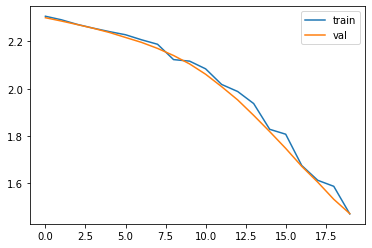

In [9]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

D:\Anaconda\Lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

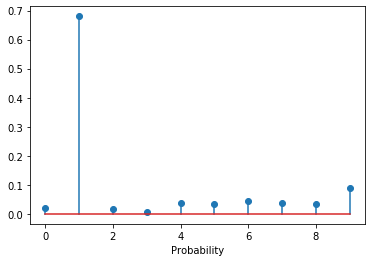

In [10]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

Which architectural hyperparameters might we change in the above?



**Exercise - Deep CNN**

Build and fit your own CNN model with 3 convolutional **modules**, where each one contains:
  * kernel convolution 
    * you pick number of kernels
    * you pick kernel shape/size
    * you pick activation
  * pooling
  * dropout

We'll use the Fashion MNIST dataset, a low-res collection of images of clothing.

In [11]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
images = images[:, :, :, np.newaxis]
labels = tf.one_hot(labels.astype(np.int32),depth=10)

# optional - TF Datasets objects
# fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
# fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)


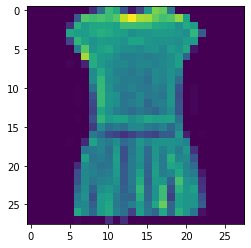

In [12]:
plt.imshow(images[3, :, :, :].squeeze())

In [36]:
# your code here
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(0.2))

#
model.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(0.2))

#
model.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(0.2))

#flatten
model.add(tfkl.GlobalMaxPool2D())
model.add(tfkl.Dense(10,activation='softmax'))

In [37]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(images,labels,steps_per_epoch=20, epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 0s 2ms/step - loss: 2.3051
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 2.2965
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 2.2896
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 2.2677
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 2.2583
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 2.2397
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 2.2067
Epoch 8/20
20/20 [==============================] - 0s 2ms/step - loss: 2.1829
Epoch 9/20
20/20 [==============================] - 0s 2ms/step - loss: 2.1528
Epoch 10/20
20/20 [==============================] - 0s 2ms/step - loss: 2.1141
Epoch 11/20
20/20 [==============================] - 0s 2ms/step - loss: 2.0842
Epoch 12/20
20/20 [==============================] - 0s 2ms/step - loss: 2.0506
Epoch 13/20
20/20 [==============================

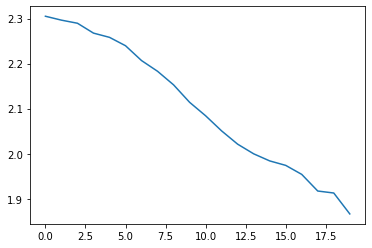

In [38]:
plt.plot(results.history["loss"])


**Exercise - Transfer Learning**



In [16]:
data, info = tfds.load('rock_paper_scissors', with_info=True)
train_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)

Shuffling and writing examples to C:\Users\gnaij\tensorflow_datasets\rock_paper_scissors\3.0.0.incomplete5NQ3YW\rock_paper_scissors-train.tfrecord


Shuffling and writing examples to C:\Users\gnaij\tensorflow_datasets\rock_paper_scissors\3.0.0.incomplete5NQ3YW\rock_paper_scissors-test.tfrecord


Dataset rock_paper_scissors downloaded and prepared to C:\Users\gnaij\tensorflow_datasets\rock_paper_scissors\3.0.0. Subsequent calls will reuse this data.


In [21]:
info.features['image'].shape

(300, 300, 3)

,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

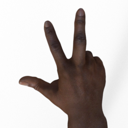
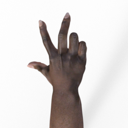
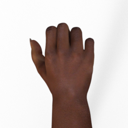
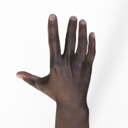
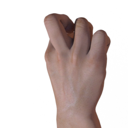
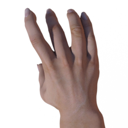
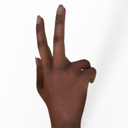
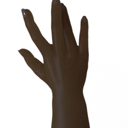
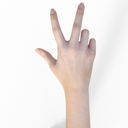
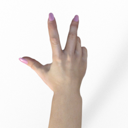

In [22]:
tfds.as_dataframe(data["train"].take(10), info)

# Exercise

1. Build a deep CNN model and train it for this binary classification task. Fit the model using the small dataset of 500 samples, *train_data*.

What accuracy can your model acheive on the training data?

In [26]:
train1 = train_data.take(500).repeat()

In [24]:
# Your code here
model1 = tfk.Sequential()
model1.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(300, 300, 3)))
model1.add(tfkl.MaxPool2D(pool_size=2))
model1.add(tfkl.Dropout(0.2))
#
model1.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=2))
model1.add(tfkl.Dropout(0.2))

#
model1.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=2))
model1.add(tfkl.Dropout(0.2))


#flatten
model1.add(tfkl.GlobalMaxPool2D())
model1.add(tfkl.Dense(3,activation='softmax'))

In [27]:
model1.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

results = model1.fit(train1,steps_per_epoch=10, epochs=20)

Epoch 1/20
10/10 [==============================] - 2s 166ms/step - loss: 1.1071 - accuracy: 0.3313
Epoch 2/20
10/10 [==============================] - 2s 164ms/step - loss: 1.0946 - accuracy: 0.3438
Epoch 3/20
10/10 [==============================] - 2s 163ms/step - loss: 1.1068 - accuracy: 0.3219
Epoch 4/20
10/10 [==============================] - 2s 165ms/step - loss: 1.1040 - accuracy: 0.3187
Epoch 5/20
10/10 [==============================] - 2s 163ms/step - loss: 1.1016 - accuracy: 0.3281
Epoch 6/20
10/10 [==============================] - 2s 162ms/step - loss: 1.0984 - accuracy: 0.3438
Epoch 7/20
10/10 [==============================] - 2s 163ms/step - loss: 1.0961 - accuracy: 0.3531
Epoch 8/20
10/10 [==============================] - 2s 158ms/step - loss: 1.0998 - accuracy: 0.3462
Epoch 9/20
10/10 [==============================] - 2s 162ms/step - loss: 1.0996 - accuracy: 0.3500
Epoch 10/20
10/10 [==============================] - 2s 161ms/step - loss: 1.0993 - accuracy: 0.3187

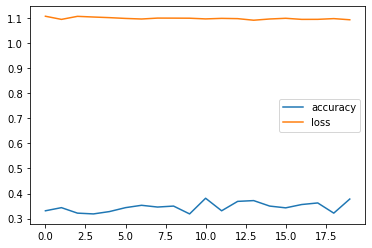

In [28]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["loss"])
plt.legend(labels=["accuracy", "loss"])

 2. Now use transfer learning by incorporating the pretrained VGG16 model.

In [31]:
from tensorflow.keras.applications import VGG16

In [32]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))

58892288/58889256 [==============================] - 110s 2us/step


Build a Sequential model, using our VGG16 base. Make sure the freeze the weights of the convolutional backbone, but leave the remainder of the network weights as learnable. Fit this model and compare the overall accuracy as well as the loss curves (efficiency).


In [33]:
# Your code here
model = tfk.Sequential()

model.add(conv_base)

for layer in model.layers:
    layer.trainable = False

model.add(tfkl.Flatten())
model.add(tfkl.Dense(3, activation = 'softmax'))

In [34]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

results = model.fit(train1,steps_per_epoch=2, epochs=20)

Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 2.4253 - accuracy: 0.4062
Epoch 2/20
2/2 [==============================] - 4s 2s/step - loss: 1.1829 - accuracy: 0.6406
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 1.6845 - accuracy: 0.5938
Epoch 4/20
2/2 [==============================] - 4s 2s/step - loss: 0.7586 - accuracy: 0.7500
Epoch 5/20
2/2 [==============================] - 6s 3s/step - loss: 0.2306 - accuracy: 0.9062
Epoch 6/20
2/2 [==============================] - 6s 3s/step - loss: 0.5127 - accuracy: 0.7500
Epoch 7/20
2/2 [==============================] - 5s 3s/step - loss: 0.2983 - accuracy: 0.9219
Epoch 8/20
2/2 [==============================] - 4s 2s/step - loss: 0.0284 - accuracy: 1.0000
Epoch 9/20
2/2 [==============================] - 4s 2s/step - loss: 0.1206 - accuracy: 0.9531
Epoch 10/20
2/2 [==============================] - 4s 2s/step - loss: 0.1721 - accuracy: 0.9375
Epoch 11/20
2/2 [==============================] 

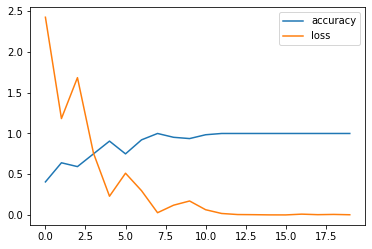

In [35]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["loss"])
plt.legend(labels=["accuracy", "loss"])